In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Building a dataset

Text(0, 0.5, 'Sy')

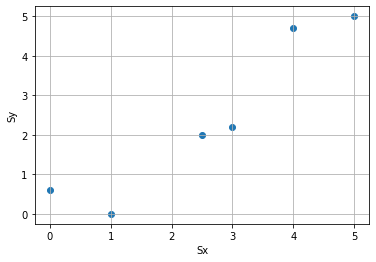

In [2]:
Sx = np.array([0, 1, 2.5, 3, 4, 5])
Sy = np.array([0.6, 0, 2, 2.2, 4.7, 5])

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

Lets assume a line 

$$y = mx + c$$

Where $m$ and $c$ are unknown, which we are trying to find.

We assume a random value for $m$ and $c$ ($m = 2$ and $c = 2$)

In [3]:
m = tf.Variable(2, dtype=tf.float32)
c = tf.Variable(2, dtype=tf.float32)

def line_fn(x):
    return m*x + c

Text(0, 0.5, 'Sy')

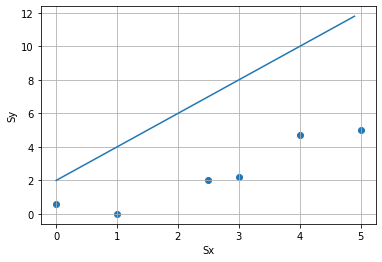

In [4]:
p = np.arange(0, 5, 0.1)
plt.plot(p, line_fn(p).numpy())

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

## Gradient descending algorithm:
$$m_{t} = m_{t-1} - lr \; \frac{\partial \;\; loss(l(x), y)}{\partial m} $$

$$loss(l(x), y) = (l(x) - y)^2$$

#### Here,

* $t$ = Time step
* $x$ = Input
* $y$ = Output
* $m$ = Updatable variable
* $loss(\cdot, \cdot)$ = Loss function
* $lr$ = Learning rate
* $l(\cdot)$ = Line function

#### Partial derivatives:

$\frac{\partial \;\; loss(l(x), y)}{\partial m} = (l(x) - y)^2$
$ = (mx+c-y)^2$
$ = 2(mx+c-y)x$

$\frac{\partial \;\; loss(l(x), y)}{\partial c} = (l(x) - y)^2$
$ = (mx+c-y)^2$
$ = 2(mx+c-y)$

In [5]:
# learning rate
lr = 0.01
total_steps = 100

for step in range(total_steps):
    print(f"Step {step+1:2}:")
    print("-"*30)

    with tf.GradientTape() as tape:
        # Printing value of the variables
        print(f"M: {m.numpy():.4f}, C: {c.numpy():.4f}")
        
        # Stating what variables need to be partially differentiated and calibrated
        tape.watch([m, c])

        # Passing the points to the line function
        pred_y = line_fn(Sx)

        # Calculating the difference/loss of the output (pred_y) of the function
        # w.r.t. the known output (Sy)
        loss = (pred_y - Sy) * (pred_y - Sy)


    # Calculating the gradients w.r.t. the partially diff. parameters
    # and the generated output loss
    grads = tape.gradient(loss, [m, c])

    # Showing the output just for educational purposs
    print(f"M_grad:, {grads[0].numpy():.2f}, C_grad: {grads[1].numpy():.2f}")

    # Updating the gradients
    m = m - lr * grads[0]
    c = c - lr * grads[1]

    print()

Step  1:
------------------------------
M: 2.0000, C: 2.0000
M_grad:, 180.20, C_grad: 57.00

Step  2:
------------------------------
M: 0.1980, C: 1.4300
M_grad:, -43.80, C_grad: -5.70

Step  3:
------------------------------
M: 0.6360, C: 1.4870
M_grad:, 8.12, C_grad: 8.56

Step  4:
------------------------------
M: 0.5548, C: 1.4014
M_grad:, -3.83, C_grad: 5.02

Step  5:
------------------------------
M: 0.5931, C: 1.3513
M_grad:, -1.00, C_grad: 5.60

Step  6:
------------------------------
M: 0.6031, C: 1.2952
M_grad:, -1.59, C_grad: 5.24

Step  7:
------------------------------
M: 0.6190, C: 1.2429
M_grad:, -1.39, C_grad: 5.10

Step  8:
------------------------------
M: 0.6330, C: 1.1918
M_grad:, -1.38, C_grad: 4.92

Step  9:
------------------------------
M: 0.6468, C: 1.1426
M_grad:, -1.33, C_grad: 4.76

Step 10:
------------------------------
M: 0.6600, C: 1.0950
M_grad:, -1.28, C_grad: 4.60

Step 11:
------------------------------
M: 0.6729, C: 1.0490
M_grad:, -1.24, C_grad: 4.

## Lets check the final result

Text(0, 0.5, 'Sy')

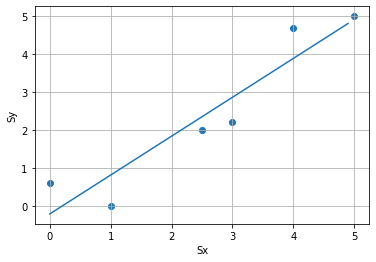

In [6]:
p = np.arange(0, 5, 0.1)
plt.plot(p, line_fn(p).numpy())

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')